In [2]:
import numpy
import random
import pandas
import itertools
import pickle
import seaborn
import matplotlib.pyplot as plt

In [3]:
#### parameters
trial = 1
num_categories = 388
num_categories_transformed = [1, 50, 100, 150, 200, 250, 300, 350, 388]
random.seed(trial) # seed fixed
category_orders = [i for i in range(num_categories)]
random.shuffle(category_orders)

params1 = [1, 50, 100, 150, 200, 250, 300, 350, 388] # number of transformed categories
params2 = ['blur', 'scale', 'quantization'] # transformation types
params_comb = [p for p in itertools.product(params1, params2)]

In [4]:
#### load data
invariance_coeffs = numpy.zeros((len(params1), len(params2), 8, 3880)) # layer / number of samples
is_transformed = numpy.zeros((len(params1), len(params2), 3880)) # number of samples
for i, p in enumerate(params_comb):
    num_category_transformed, transformation_type = p[0], p[1]
    with open('/Users/hojinjang/Desktop/DeepLearning/RobustFaceRecog/results/v1/id{}/analysis_v1_invariance_coefficient.pickle'.format(i+1), 'rb') as f:
        data = pickle.load(f)

    is_transformed[params1.index(num_category_transformed), params2.index(transformation_type), :] = \
        numpy.asarray([1 if t in category_orders[:num_category_transformed] else 0 for t in data['target']])

    if transformation_type == 'blur':
        param_of_interest = 3.
    elif transformation_type == 'scale':
        param_of_interest = 0.3
    elif transformation_type == 'quantization':
        param_of_interest = 0.3

    invariance_coeffs[params1.index(num_category_transformed), params2.index(transformation_type), :, :] = \
        data['invariance_coef'][:, :, data['params'].index(param_of_interest)]

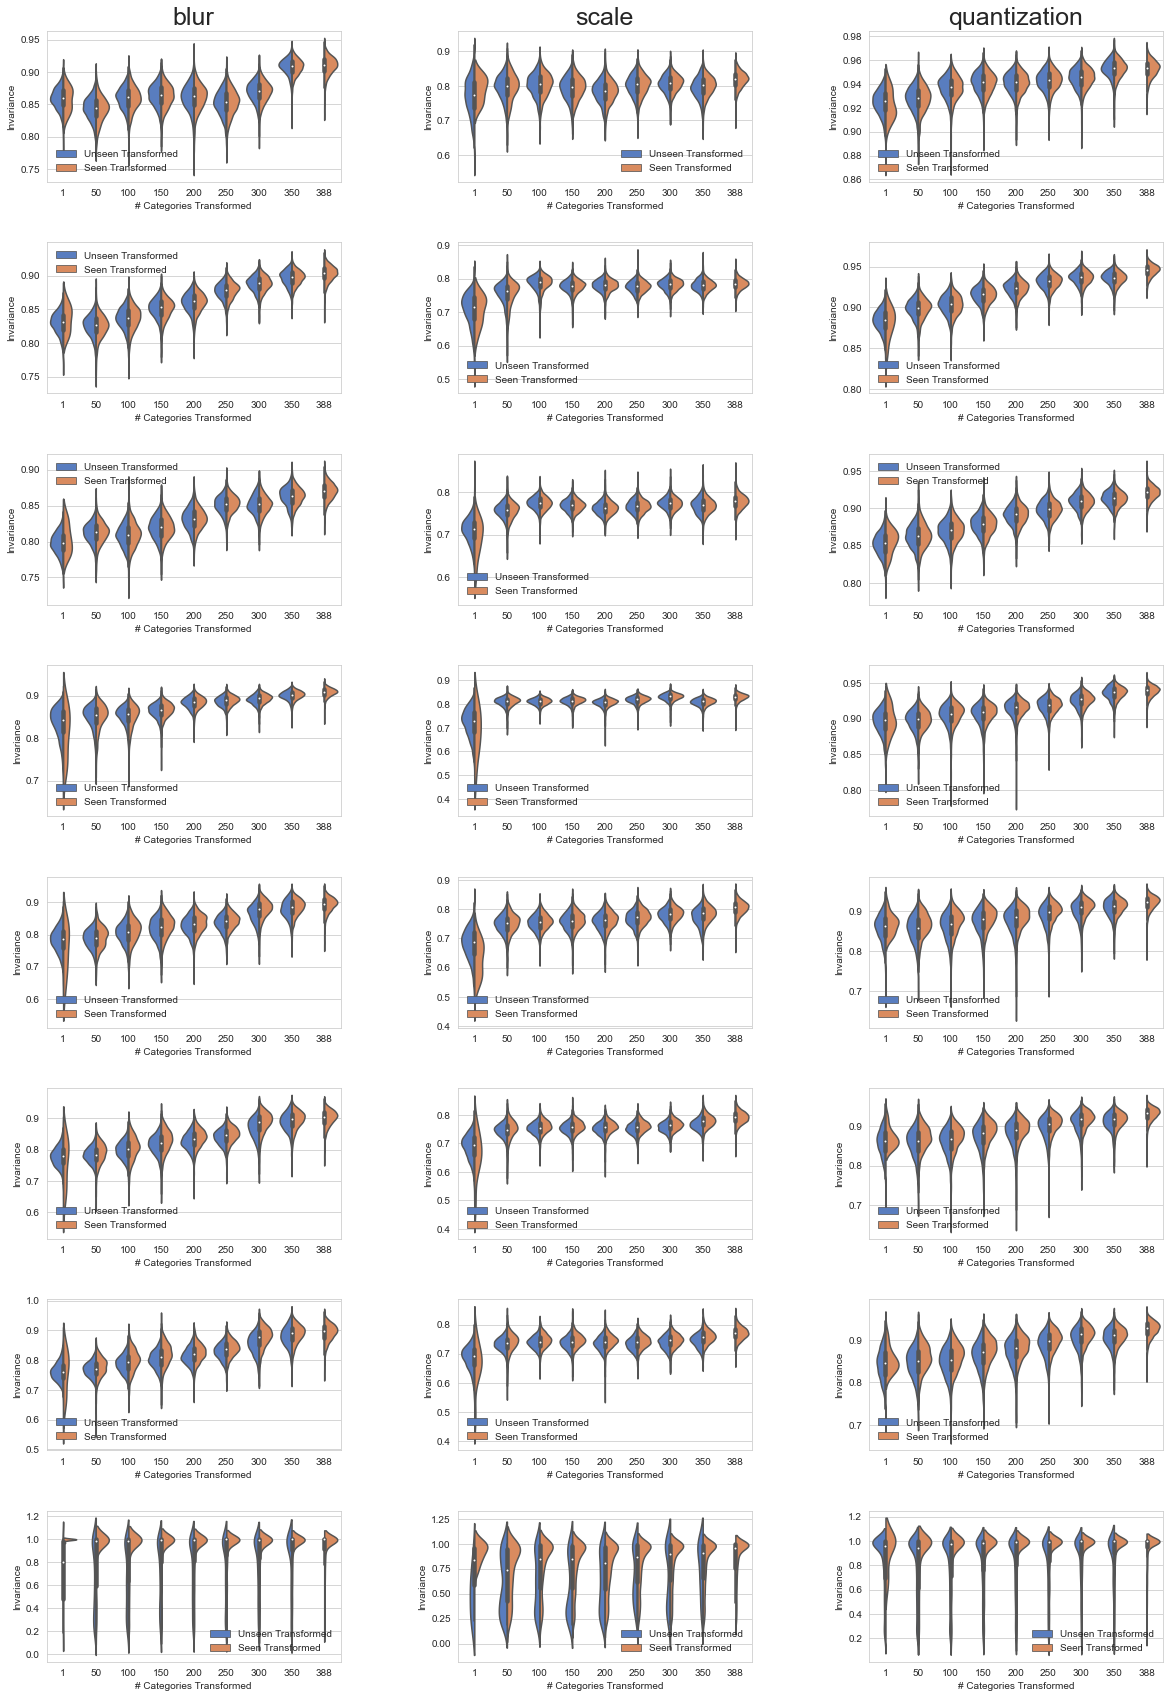

In [20]:
#### visualize
plt.figure(figsize=(20,30))

for i in range(8):
    for j in range(3):
        d = {'invariance_coef':invariance_coeffs[:,j,i,:].flatten(), 'num_category_transformed':numpy.concatenate([numpy.tile(p, (3880)) for p in params1]), 'is_transformed':is_transformed[:,j,:].flatten()}
        df = pandas.DataFrame(data=d)

        plt.subplot(8,3, 3*i+j+1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)
        ax = seaborn.violinplot(data=df, x='num_category_transformed', y='invariance_coef', hue='is_transformed', palette='muted', split=True)

        plt.xlabel('# Categories Transformed')
        plt.ylabel('Invariance')
        # plt.ylim(0,1)
        ax.legend(handles=ax.legend_.legendHandles, labels=['Unseen Transformed', 'Seen Transformed'], frameon=False)

        if i == 0:
            plt.title(params2[j], fontdict = {'fontsize':25})